# 3.2 Classification/Regression

Python program to build and test a model for gwp and star dataset, using the dataset obtained from Task 3.1.

In [1]:
import numpy as np
from sklearn.svm import SVR, SVC
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2

import bamboo.gwp_pipeline as gwp
import bamboo.star_pipeline as star
from bamboo.processing import read_csv, split_features_and_target, get_feature_and_target_names 
from bamboo.selection import normalize_data
from bamboo.model import Model, prepare_classification_predictions
from bamboo.analysis import plot_precision_recall_curve, plot_roc_curve

SEED = 42

GWP_CSV = 'datasets/gwp_assessment.csv'
STAR_CSV = 'datasets/star_assessment.csv'

## GWP Model Implementation 

### 1. Data preperation

In [2]:
# Load data from csv
gwp_data = read_csv(GWP_CSV)

# Process data
gwp_dataset = gwp.gwp_pipeline(gwp_data)

# Split feature and target sets
X, y = split_features_and_target(gwp_dataset)
X_names, y_name = get_feature_and_target_names(gwp_dataset)

# Split the data into training and test sets
X_gwp_train, X_gwp_test, y_gwp_train, y_gwp_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Normalise the data 
X_gwp_train, X_gwp_test = normalize_data(X_gwp_train, X_gwp_test)

/Users/nickolaitchesnokov/Desktop/Code/Projects/data_mining/bamboo/processing.py:12: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data = np.genfromtxt(csv_file, delimiter=',', dtype=None, names=True)


### 2. Initializing parameters
We will be using a Support Vector Regression (SVR) model for gwp dataset. Here we define the different type of parametes we will be running the model on.

In [3]:
# Initialize the SVR model parammeters
parameters = {
    'kernel': ['rbf', 'linear', 'poly','rbf', 'sigmoid'],
    'C': [0.01, 0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001, 0.0001],
    'epsilon': [0.01, 0.1, 0.2, 0.5]
}

svr = SVR()

# Instantiate the Model class with SVR model and the parameter grid
gwp_model = Model(model=svr, params=parameters, search_type='GridSearch')
gwp_model.fit(X_gwp_train, y_gwp_train)

# Save the model
gwp_model.save_model('models/gwp/svr.pkl')
gwp_model.save_results('results/gwp/svr.pkl')

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[CV] END ........C=0.01, epsilon=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........C=0.01, epsilon=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........C=0.01, epsilon=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........C=0.01, epsilon=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........C=0.01, epsilon=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .....C=0.01, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....C=0.01, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....C=0.01, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....C=0.01, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....C=0.01, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......C=0.01, epsilon=0.01, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......C=0.01, epsilon=0.01, gamma=0

### 3. Training our model

### Star Model Implementation using SVC

In [4]:
# Load data from csv
star_data = read_csv(STAR_CSV)

# Process data
star_dataset = star.star_pipeline(star_data)

# Split feature and target sets
X, y = split_features_and_target(star_dataset)
X_names, y_name = get_feature_and_target_names(star_dataset)

# Split the data into training and test sets
X_star_train, X_star_test, y_star_train, y_star_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Normalise the data 
X_star_train, X_star_test = normalize_data(X_star_train, X_star_test)

/Users/nickolaitchesnokov/Desktop/Code/Projects/data_mining/bamboo/processing.py:12: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data = np.genfromtxt(csv_file, delimiter=',', dtype=None, names=True)


In [6]:
# Initialize the SVC search parammeters
parameters = {
    'kernel': ['rbf', 'linear', 'poly','rbf', 'sigmoid'],
    'C': [0.01, 0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001, 0.0001],
}

svc = SVC(probability=True)

# Instantiate the Model class with SVR model and the parameter grid
star_model = Model(model=svc, params=parameters, search_type="HalvingGridSearch")
star_model.fit(X_star_train, y_star_train)

# Save the model
star_model.save_model('models/star/svc.pkl')
star_model.save_results('results/star/svc.pkl')

n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 1
min_resources_: 80000
max_resources_: 80000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1
n_resources: 80000
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END .........................................kernel=rbf; total time= 1.6min
[CV] END .........................................kernel=rbf; total time= 1.5min


## Training & Testing Analysis

In [8]:
gwp_model = Model()
gwp_model.load_model('models/gwp/svr.pkl')
gwp_model.load_results('results/gwp/svr.pkl')

star_model = Model()
star_model.load_model('models/star/svc.pkl')
star_model.load_results('results/star/svc.pkl')

print(star_model.model)

SVC(probability=True)


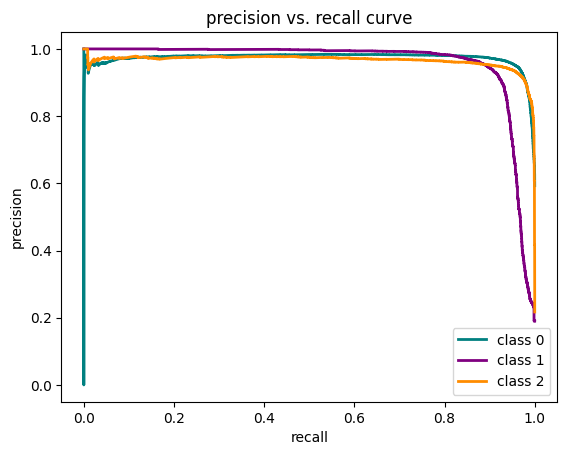

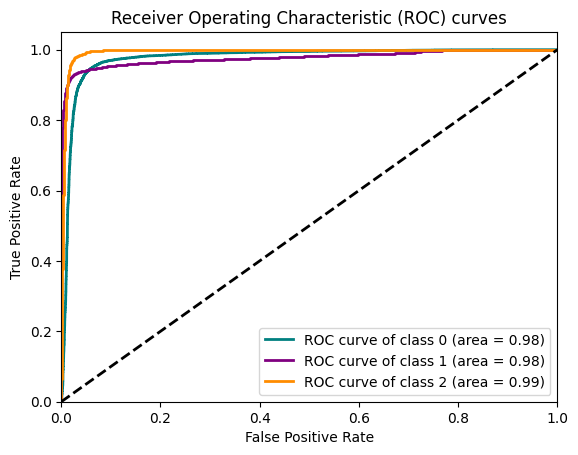

In [9]:
# Get the unique classes
classes = np.unique(y_star_test)
data_per_class = prepare_classification_predictions(star_model.model, X_star_test, y_star_test, classes)

# Plot precision-recall curve
plot_precision_recall_curve(data_per_class, classes)

# Plot ROC curves
plot_roc_curve(data_per_class, classes)


#### Markdown Question: 
**Question**: Is Linear Regression a good model to use for the star dataset? Justify your answer.